# Handwritten character recognition (Working with EMNIST data) #

EMNIST (Extended Modified National Institute of Standards and Technology) is a set of handwritten character digits derived from the NIST Special Database 19. Each image in this dataset has a dimension of 28x28. More information about this dataset can be found here:

https://www.nist.gov/itl/products-and-services/emnist-dataset

We will be going through 2 very important steps in the machine learning workflow:

* Data exploration - Retrieving, cleaning and preprocessing data
* Modeling - Developing a model and evaulating it

The following packages mut be installed to run this notebook:

In [ ]:
pip install keras
pip install tensorflow

## Data exploration ##

### Step 1: Retrieving the data ###

There are 6 different sets for this dataset provided in Binary and CSV formats. There are also 6 different types of splits provided for it. I will be using the Balanced split downloaded from Kaggle:

https://www.kaggle.com/crawford/emnist


This split has train and test data for 47 classes. The balanced split has a more uniform distribution of the classes (~2400 images for each class). Each row in the data represents an image. The first column is the label, and the remaining 784 columns correspond to the reshaped image. There are a total of 112799 train images and 18799 test images.

In [1]:
# Import modules
import numpy as np
import pandas as pd
from keras.utils import np_utils

# Read data from CSV files
train = pd.read_csv("data/emnist-balanced-train.csv",delimiter = ',')
test = pd.read_csv("data/emnist-balanced-test.csv", delimiter = ',')

# classmap is a map that goes from the label to the actual character
classmap = pd.read_csv("data/emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)

# Split features and labels
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]
test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]

del train
del test

train_x = np.asarray(train_x)
test_x = np.asarray(test_x)

print("Train data feature shape: ", train_x.shape)
print("Test data feature shape: ", test_x.shape)
print("Train data label shape: ", train_y.shape)
print("Test data label shape: ", test_y.shape)

Train data feature shape:  (112799, 784)
Test data feature shape:  (18799, 784)
Train data label shape:  (112799,)
Test data label shape:  (18799,)


In [2]:
# Let us define a function to preprocess the image and then apply this function to every row of our data
# This function reshapes the image into 28x28, flips it and rotates it by 90 degrees
def preprocess_image(input_iname):
    input_iname = input_iname.reshape([28,28])
    input_iname = np.fliplr(input_iname)
    input_iname = np.rot90(input_iname)
    return input_iname

train_x = np.apply_along_axis(preprocess_image, 1, train_x)
test_x = np.apply_along_axis(preprocess_image, 1, test_x)

# We normalize the image so that the pixel intensities are between 0 and 1
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

print("Train data feature shape: ", train_x.shape)
print("Test data feature shape: ", test_x.shape)
print("Train data label shape: ", train_y.shape)
print("Test data label shape: ", test_y.shape)

Train data feature shape:  (112799, 28, 28)
Test data feature shape:  (18799, 28, 28)
Train data label shape:  (112799,)
Test data label shape:  (18799,)


### Step 2: Exploration ###

Let us first take a look at some same images for the 47 labels

The target labels are ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']


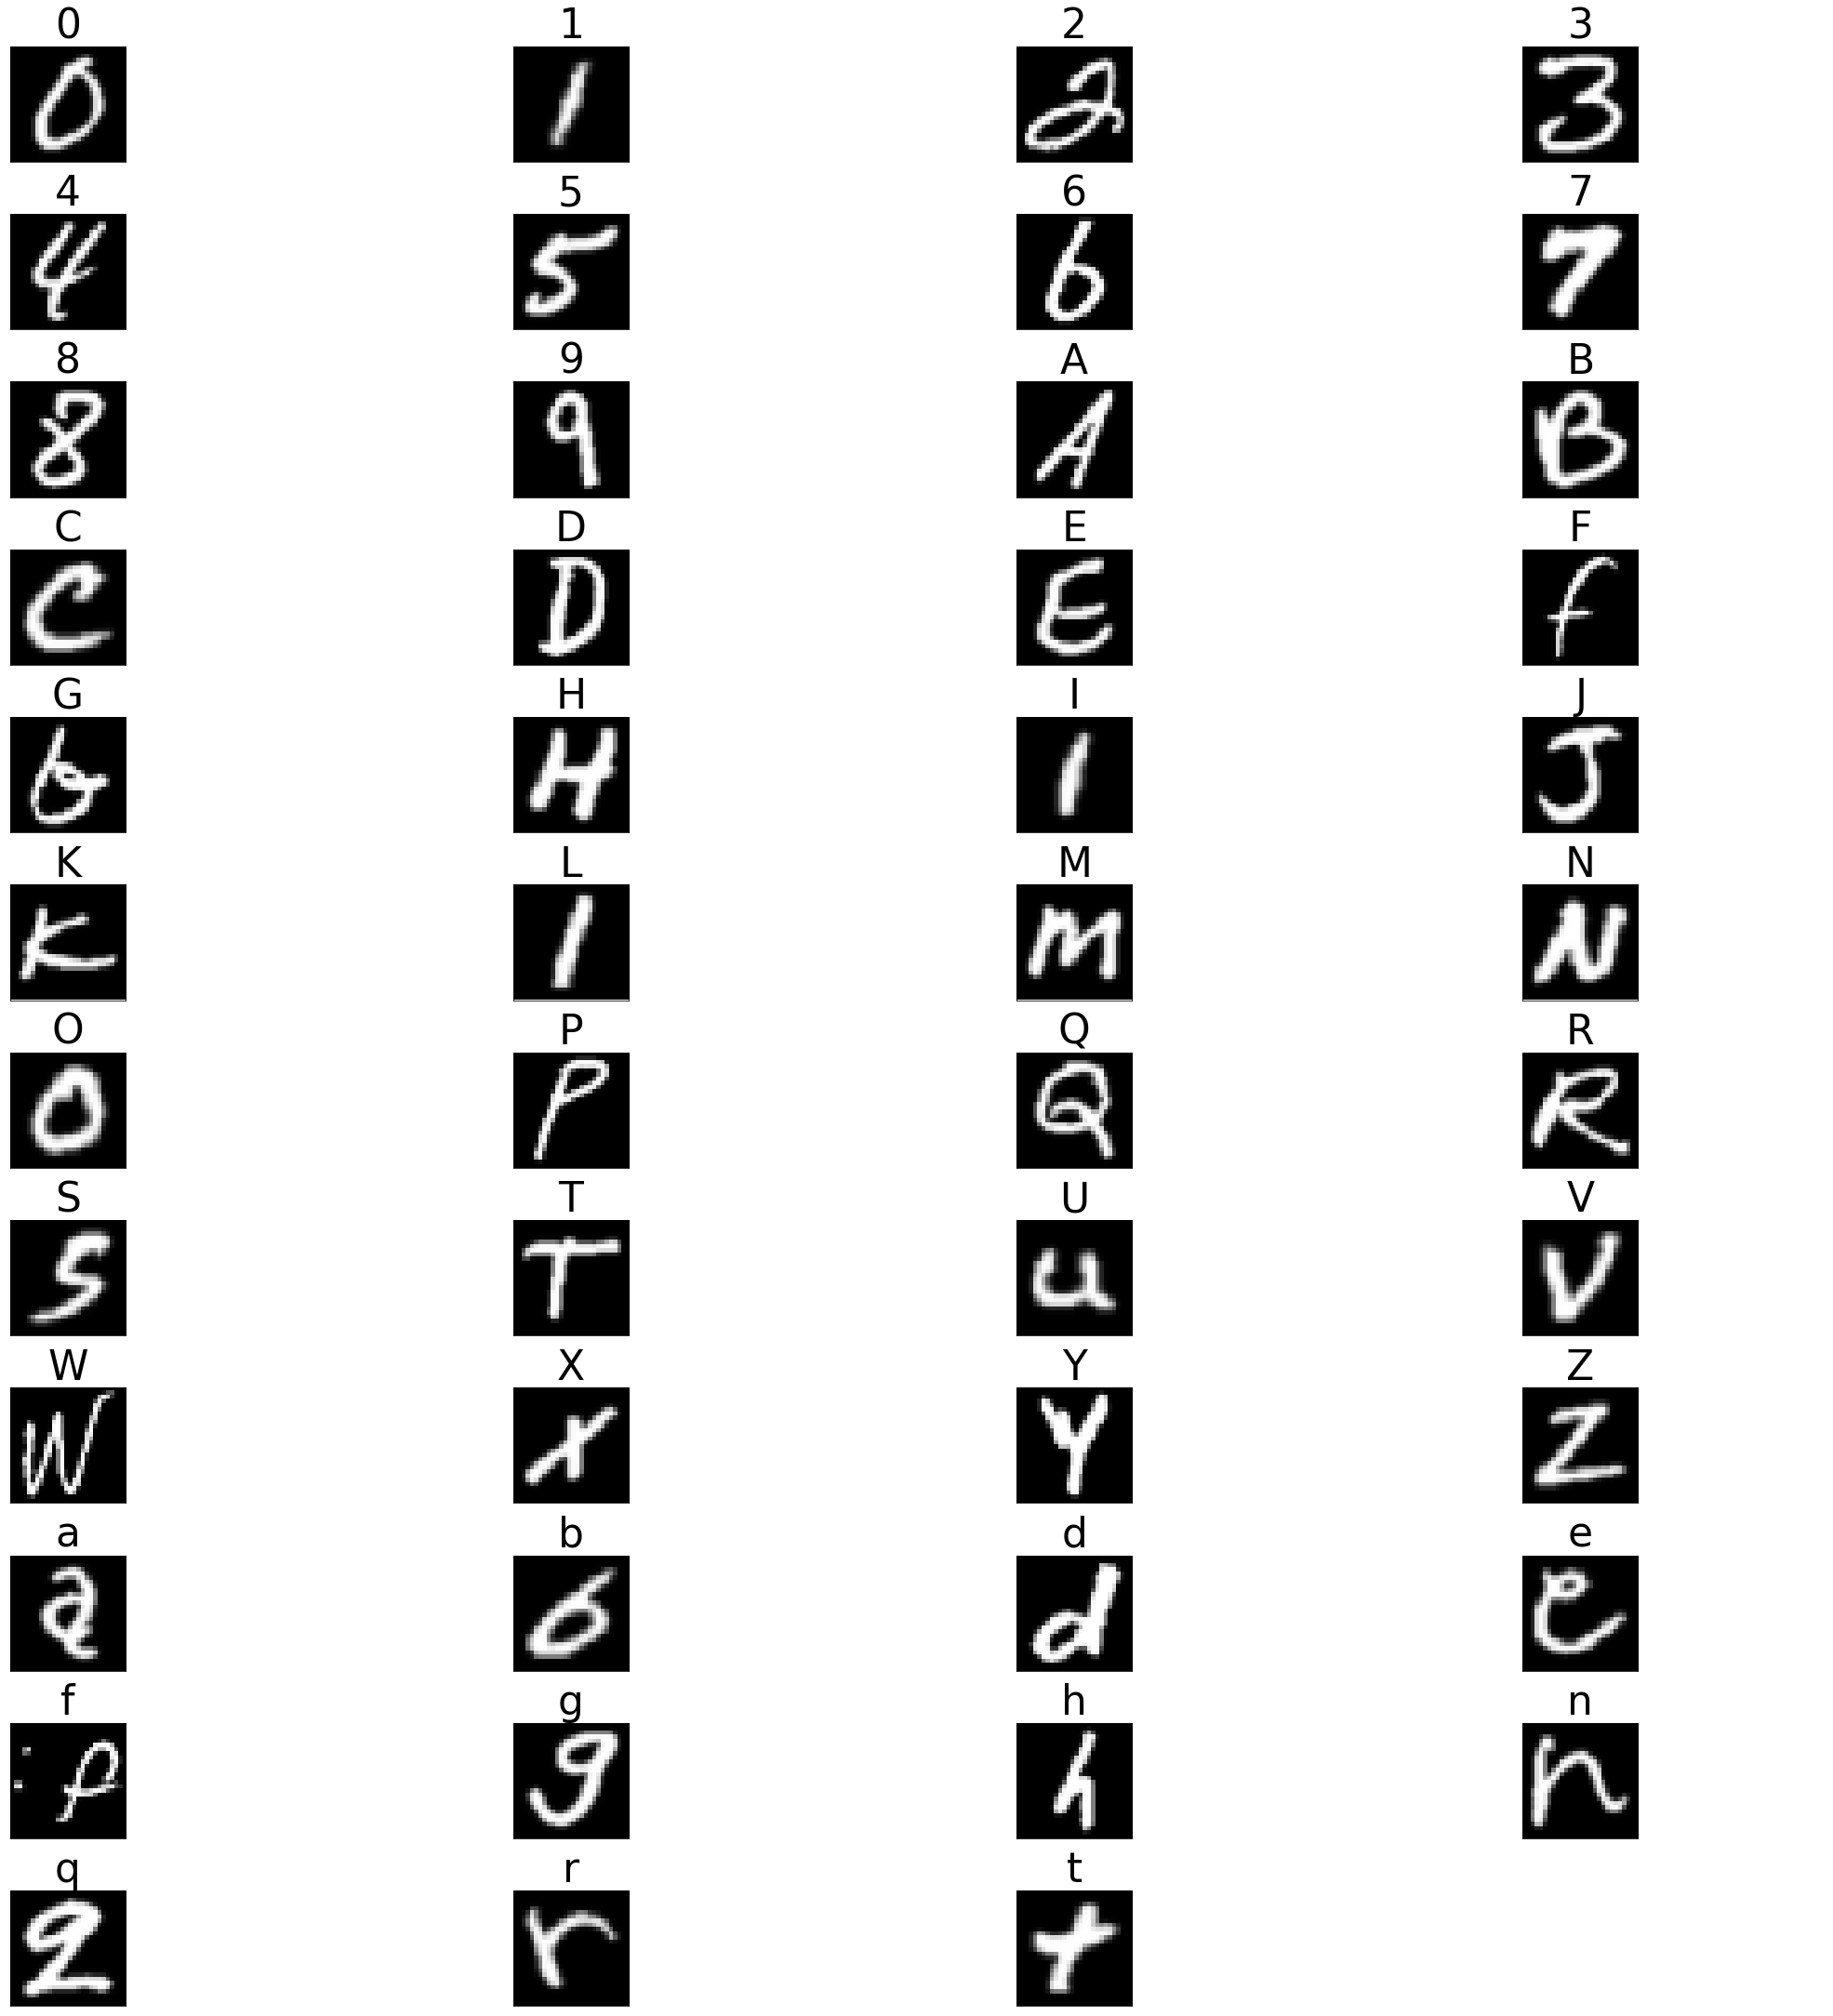

In [7]:
import random
import matplotlib.pyplot as plt
labels = list(map(chr, list(classmap.values)))
print(f'The target labels are {labels}')

fig, axs = plt.subplots(12,4, constrained_layout=True, figsize=(30,30))
count = 0

for ax in axs.flat:
    if count < 47:
        idx = np.where(train_y == count)
        random_index = random.sample(list(idx), 1)
        image = train_x[random_index[0][0],:]
        ax.imshow(image, cmap=plt.get_cmap('gray'))
        ax.set_title(chr(classmap[count]), fontsize=44)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.axis('off')
    count += 1   

Let's now look at the distibution of training data across all labels

/Users/madhumitharaghu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, 'A'),
 Text(11, 0, 'B'),
 Text(12, 0, 'C'),
 Text(13, 0, 'D'),
 Text(14, 0, 'E'),
 Text(15, 0, 'F'),
 Text(16, 0, 'G'),
 Text(17, 0, 'H'),
 Text(18, 0, 'I'),
 Text(19, 0, 'J'),
 Text(20, 0, 'K'),
 Text(21, 0, 'L'),
 Text(22, 0, 'M'),
 Text(23, 0, 'N'),
 Text(24, 0, 'O'),
 Text(25, 0, 'P'),
 Text(26, 0, 'Q'),
 Text(27, 0, 'R'),
 Text(28, 0, 'S'),
 Text(29, 0, 'T'),
 Text(30, 0, 'U'),
 Text(31, 0, 'V'),
 Text(32, 0, 'W'),
 Text(33, 0, 'X'),
 Text(34, 0, 'Y'),
 Text(35, 0, 'Z'),
 Text(36, 0, 'a'),
 Text(37, 0, 'b'),
 Text(38, 0, 'd'),
 Text(39, 0, 'e'),
 Text(40, 0, 'f'),
 Text(41, 0, 'g'),
 Text(42, 0, 'h'),
 Text(43, 0, 'n'),
 Text(44, 0, 'q'),
 Text(45, 0, 'r'),
 Text(46, 0, 't')]

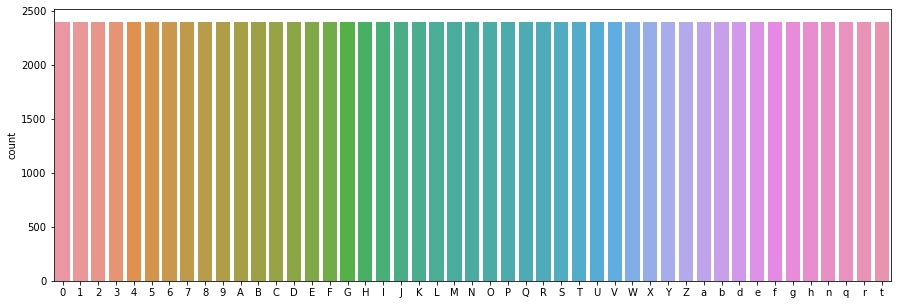

In [8]:
import seaborn as sns
fig = plt.gcf()
fig.set_figwidth(15)
fig.set_figheight(5)
ax = sns.countplot(train_y.values)
ax.set_xticklabels(labels)

Let's now look at the distirbution of pixel intensities in a few sample images. Note that we are working with black and white images. So, the pixel intensity is between 0 and 1.

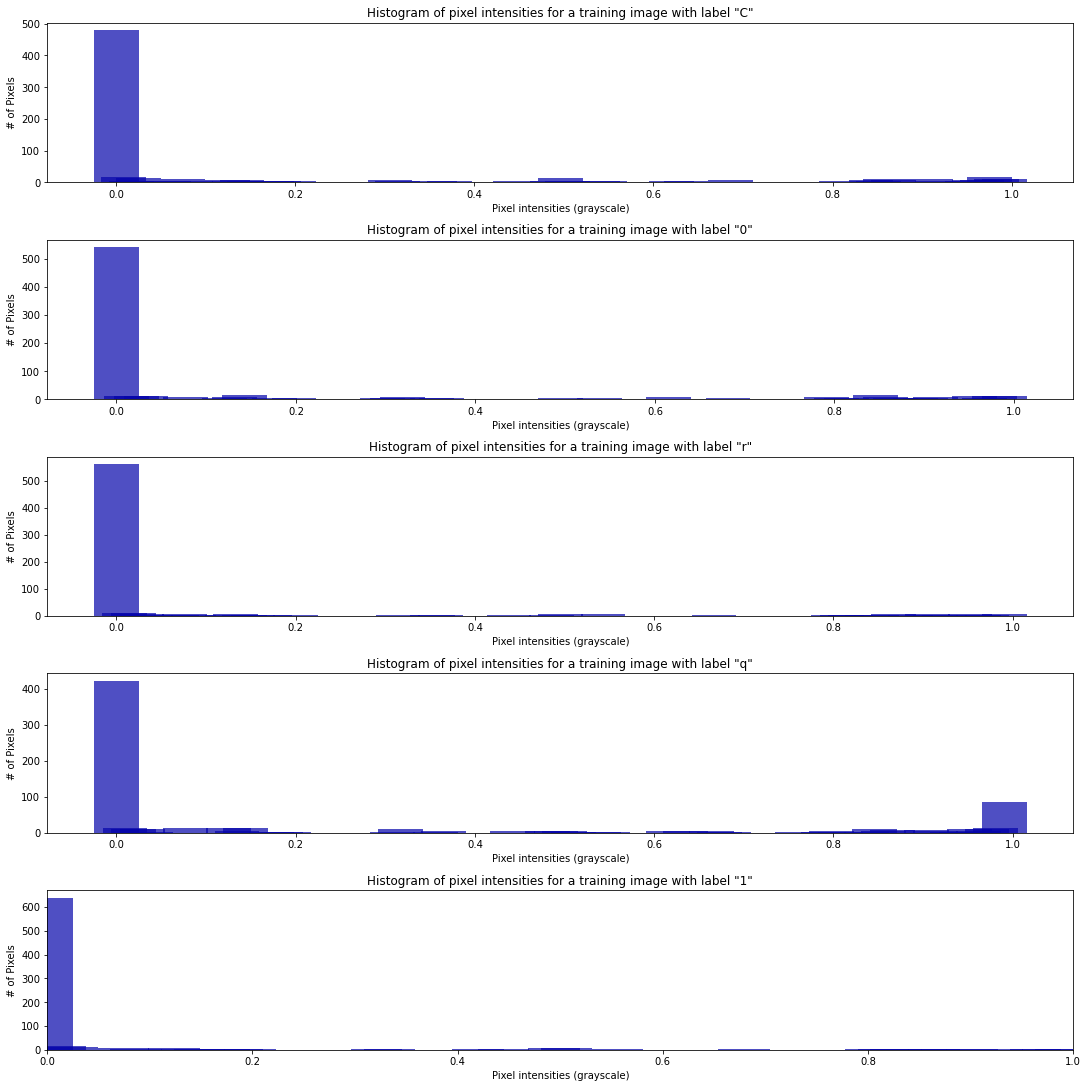

In [9]:
# Let us look at 5 random training. We will plot histograms of pixel intensities
classes = sorted(train_y.unique())
random_index = random.sample(classes, 5)
fig, axs = plt.subplots(5, 1, constrained_layout=True, figsize=(15,15))
count = 0
for ax in axs.flat:
    sample_image_idx = train_y.index[train_y == random_index[count]].tolist()
    sample_image = train_x[sample_image_idx[0]] # pick first image
    min_intensity = sample_image.min()
    max_intensity = sample_image.max()
    unique_intensity = np.unique(sample_image)
    histogram, bin_edges = np.histogram(sample_image, bins=len(unique_intensity), range=(min_intensity, max_intensity))
    ax.set_xlabel("Pixel intensities (grayscale)")
    ax.set_ylabel("# of Pixels")
    ax.set_title(f'Histogram of pixel intensities for a training image with label "{chr(classmap[random_index[count]])}"')
    ax.bar(bin_edges[:-1], histogram, width = 0.05, color='#0504aa',alpha=0.7)
    plt.xlim(min(bin_edges), max(bin_edges))
    count += 1
    

We see that most of the pixels are black and they corrspond to the background. The features that reprsent the character have intensities between 0 and 1.

Next, it would be good to understand the variability within each class. For this, we will find the mean image for each label and then look at the distance between this mean image and the training data for each class.

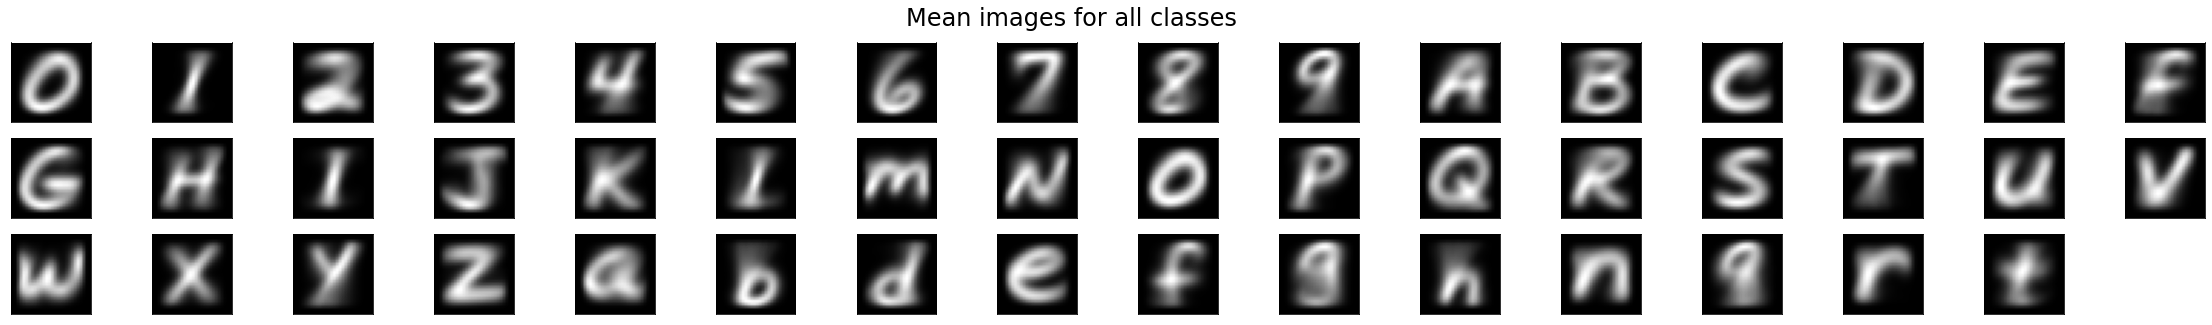

In [10]:
# Let's compute the average image for each class and plot it
import numpy as np
mean_images = np.empty(shape=(len(classes), 28,28), dtype=np.float32)
for iter in range(0, len(classes)):
    sample_image_idx = train_y.index[train_y == iter].tolist()
    t = train_x[sample_image_idx]
    mean_images[iter]= np.average(t,axis=0)

fig=plt.figure(figsize=(40,5))
fig.suptitle('Mean images for all classes', fontsize=24)
fig.tight_layout() 

for i in range(1,len(classes)+1):
    ax=fig.add_subplot(3,16,i) 
    ax.imshow(mean_images[i-1], cmap=plt.get_cmap('gray'))
    ax.set_xticks([])
    ax.set_yticks([])

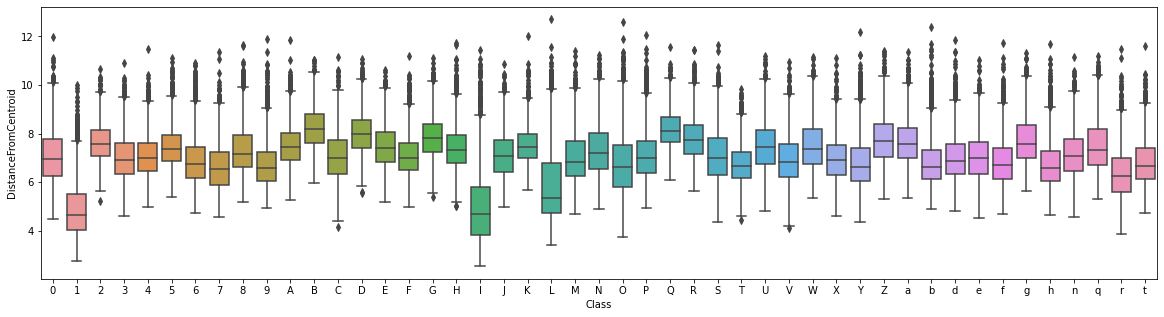

In [11]:
# Let us find out how training images in each class vary from the average image
import seaborn as sns
import numpy as np
import pandas as pd
import numpy.matlib

def euclidDistance(im1, im2):
    # computes eucliden distance between 2 images
    return (np.sum((im1-im2)**2))**0.5

df = pd.DataFrame()

# We first compute the euclidean distance of each image from its mean
for iter in range(0, len(classes)):
    count += 1
    sample_image_idx = train_y.index[train_y == iter].tolist()
    t = train_x[sample_image_idx]
    train_x_dist_from_mean = np.empty(shape=(len(t), 1), dtype=np.float32) 
    df_temp = pd.DataFrame()
    cls = np.matlib.repmat(chr(classmap[iter]), len(t), 1)
    for iter1 in range(0, len(t)):
        train_x_dist_from_mean[iter1] = euclidDistance(t[iter1], mean_images[iter])
    df_temp['Class'] = cls.tolist()
    df_temp['DistanceFromCentroid'] = train_x_dist_from_mean.tolist()
    df = pd.concat([df, df_temp])
    
# We then use a box plot to visualize this
df = df.explode("DistanceFromCentroid")
df = df.explode("Class")
plt.rcParams["figure.figsize"] = (20, 5)
ax = sns.boxplot(x="Class", y="DistanceFromCentroid", data=df)

Some digits like 0, 2 and some alphabets like O have high variability because we can see that, on an average, the samples are at greater distance from the centroid. 1 and I have low variability and we can see that they are closer to their mean.

There are many outliers. We can visualize examples of these outliers to figure out why they are at a great distance from the mean image.

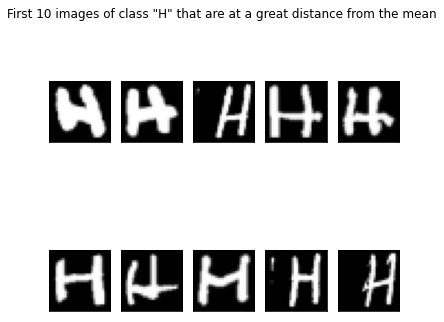

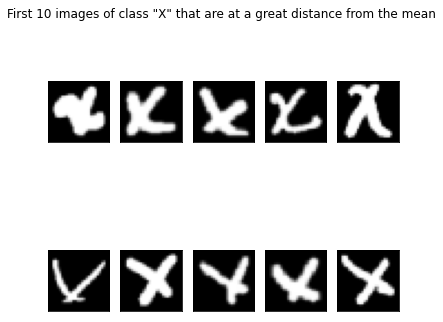

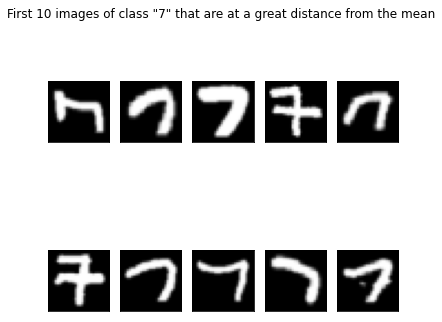

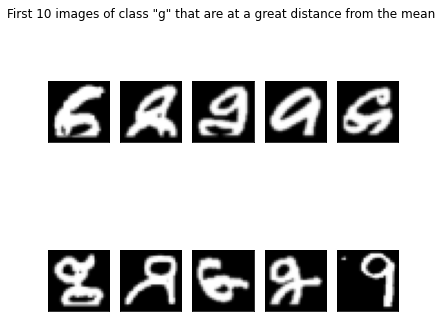

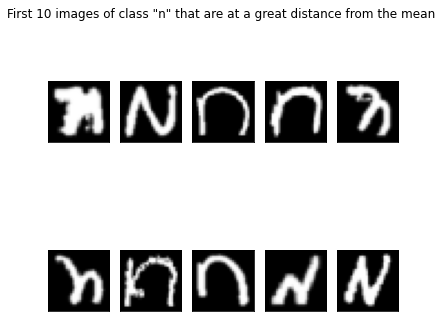

In [12]:
# Let us sort the distance in decending order and look at the images which were far away from the mean. 
# We will do this for 5 randomly selected classes
import random

# Pick 5 random classes
random_cls_index = random.sample(classes, 5)

for iter in random_cls_index:
    sample_image_idx = train_y.index[train_y == iter].tolist()
    t = train_x[sample_image_idx]
    df_temp = df[df.Class == chr(classmap[iter])]
    idx = df_temp.sort_values(by=['DistanceFromCentroid'], ascending=False).index
    count = 0
    fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(5,5))
    fig.suptitle(f'First 10 images of class "{chr(classmap[iter])}" that are at a great distance from the mean')
    for ax in axs.flat:
        ax.imshow(t[idx[count]], cmap=plt.get_cmap('gray'))
        ax.set_xticks([])
        ax.set_yticks([])
        count += 1

Given the variation in these images, it is evident why they are really far from the average image.

Another useful visualization is a pairwise comparison of digits. This is obtained by subtracting each of the mean images from the mean image of a specific label. It tells us about features that can be used to discern one image from the other.

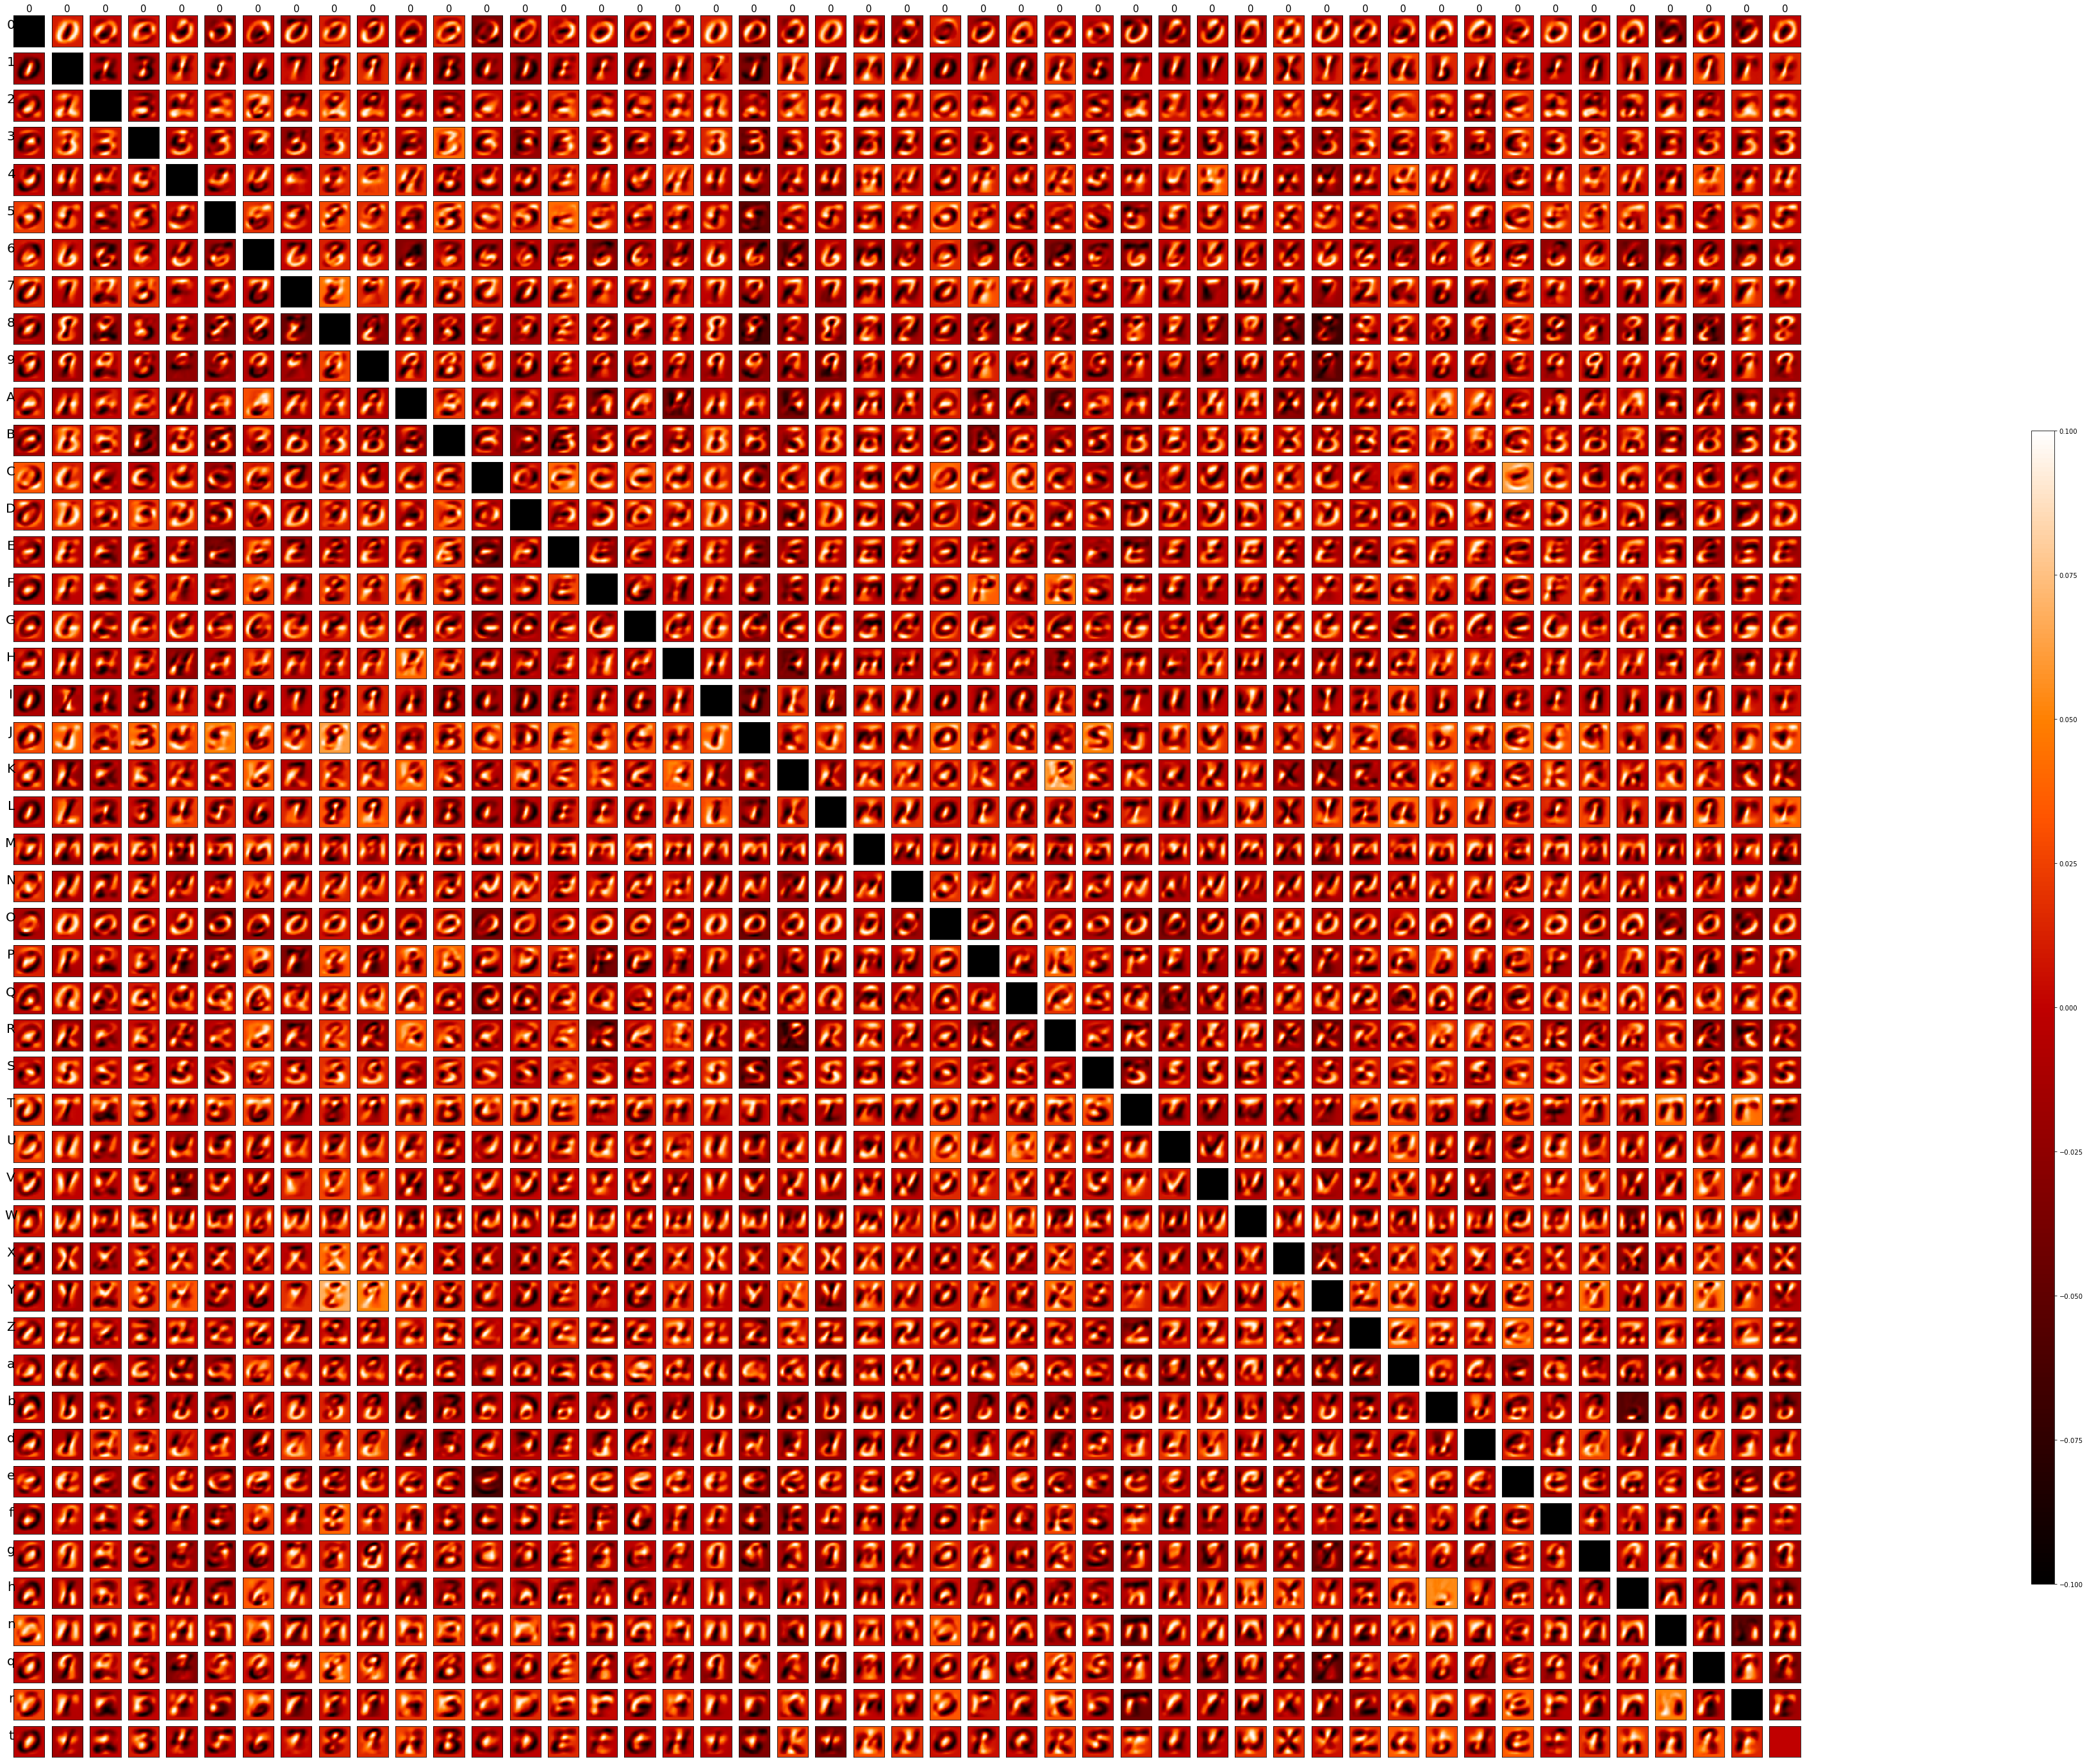

In [95]:
# Pair-wise comparison of each classes for a given label
fig = plt.gcf()
fig.set_figheight(50)
fig.set_figwidth(50)
plot_size = 47
plot_index = 1

for iter1 in range(0,plot_size):
    count = 0
    for iter2 in range(0,plot_size):
        t = mean_images[iter1] - mean_images[iter2]
        plt.subplot(plot_size, plot_size, plot_index)
        im = plt.imshow(t, cmap='gist_heat', interpolation='nearest')
        ax = plt.gca()
        ax.set_xticks([])
        ax.set_yticks([])
        if count == 0:
            h = ax.set_ylabel(f'{chr(classmap[iter1])}', size=20)
            h.set_rotation(0) 
        if iter1 == 0:
            ax.set_title(f'{chr(classmap[iter1])}', size=15)
        count += 1
        plot_index += 1


cb_ax = fig.add_axes([1, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cb_ax)

The diagonal is all black because we are subtracting the mean of a category from itself. Regions which are black or yellow make it easy to differentiate one label from the other because they are regions where some features are pronounced because the difference in intensity values is higher. Let's look at a concrete example.

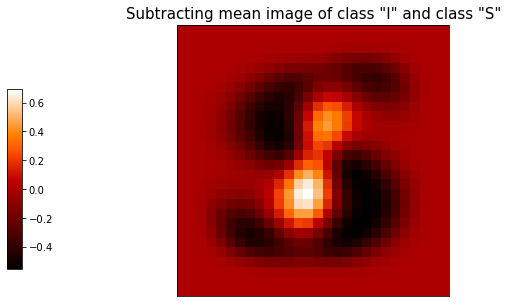

In [96]:
# Let's subtract the mean image of "S" from "I"
idx1 = labels.index('I')
idx2 = labels.index('S')
fig = plt.gcf()
t = mean_images[idx1] - mean_images[idx2]
im = plt.imshow(t, cmap='gist_heat', interpolation='nearest')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(f'Subtracting mean image of class "{chr(classmap[idx1])}" and class "{chr(classmap[idx2])}"', size=15)
cb_ax = fig.add_axes([0.3, 0.2, 0.01, 0.5])
cbar = fig.colorbar(im, cax=cb_ax)

"S" and "I" are very different from the each other and this is evident from the difference image. We are able to identify "S" as the black regions in this image.

One last thing that we can do is try to figure out if the data can be segmented into different clusters. Since this is a high dimensional data set, for visualization purpose, we will be using t-SNE (t-Distributed Stochastic Neighbor Embedding).

Train data feature shape:  (112799, 784)
Train data label shape:  (112799,)
Shape of X:  (9700, 784)


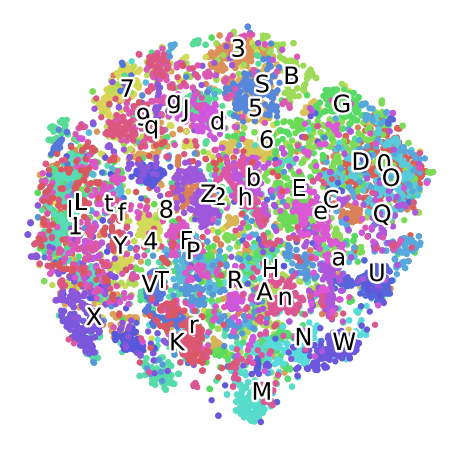

In [29]:
# Ref : https://www.oreilly.com/content/an-illustrated-introduction-to-the-t-sne-algorithm/
# Reshape input image to be 2D
train_x = train_x.reshape(len(train_x),-1)

print("Train data feature shape: ", train_x.shape)
print("Train data label shape: ", train_y.shape)

# let's pick 200 images from each class and concatenate the results
idx = np.where(train_y == 0)
random_index = random.sample(list(idx[0]), 500)
X = train_x[random_index,:]
Y = train_y[random_index]


for iter in range(1, 47):
    idx = np.where(train_y == iter)
    random_index = random.sample(list(idx[0]), 200)
    X = np.vstack((X,train_x[random_index,:]))
    Y = np.hstack((Y, train_y[random_index]))
print("Shape of X: ", X.shape)
    
# We apply t-SNE on this simplified data
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca', random_state=1200)
X_tsne = tsne.fit_transform(X)

# Let's us plot the data
import seaborn as sns
import matplotlib.patheffects as PathEffects

def plot_data(x, colors, classmap):
    # Choose color palette for 47 classes
    palette = np.array(sns.color_palette("hls", 47))

    # Create a scatter plot
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(47):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, chr(classmap[i]), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
plot_data(X_tsne, Y, classmap)

What we see is a lot of overlap between different labels.

# Modeling #

We will be using a CNN to classify the images into different categories. CNNs are feed forward neural networks and they are effective in reducing the number of parameters (when compared to a traditional MLP) to be learnt, by employing filters. These filters help us exploit the spatial correlation of pixels. 

We will be using keras Sequential class:
https://keras.io/api/models/sequential/

In [15]:
# Reshape training data
def reshape_image(input_image):
    input_image = input_image.reshape([28,28])
    return input_image

train_x = np.apply_along_axis(reshape_image, 1, train_x)

# Preprocess data for CNN
num_classes = train_y.nunique()

# One hot encoding of labels 
train_y = np_utils.to_categorical(train_y, num_classes)
test_y = np_utils.to_categorical(test_y, num_classes)


# Reshape image for CNN (Requires 4D input -> (batch size, height, width, depth))
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

print("Train data feature shape: ", train_x.shape)
print("Test data feature shape: ", test_x.shape)
print("Train data label shape: ", train_y.shape)
print("Test data label shape: ", test_y.shape)

Train data feature shape:  (112799, 28, 28, 1)
Test data feature shape:  (18799, 28, 28, 1)
Train data label shape:  (112799, 47)
Test data label shape:  (18799, 47)


Next, we will be defining a simple model with the following attributes:

* 2 convolution layers with 32 and 64 filters in each layer respectively
* One fully connected layer with 128 units and utilizing 'relu' activation function

In [120]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

      
def build_model():
    model = Sequential()
    # Add a convolution layer with 32 filters
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))  
    model.add(MaxPooling2D(pool_size=2))
    # Add a second convolution layer
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))          
    model.add(MaxPooling2D(pool_size=2))        
    model.add(Flatten())
    # First fully connected layer with 128 units
    model.add(Dense(units=128, activation='relu'))
    # Output layer with 47 units
    model.add(Dense(units=47, activation='softmax')) 
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    return model

In [121]:
# Let's print a description of our model
model = build_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_17 (Dense)             (None, 47)               

#### Visualizing feature maps ####
* Capture the result of applying filter to input image
* Tells us what features in the image are detected
* Filters close to the input image pick up small, fine-grained details and the ones close to the output captures more general features

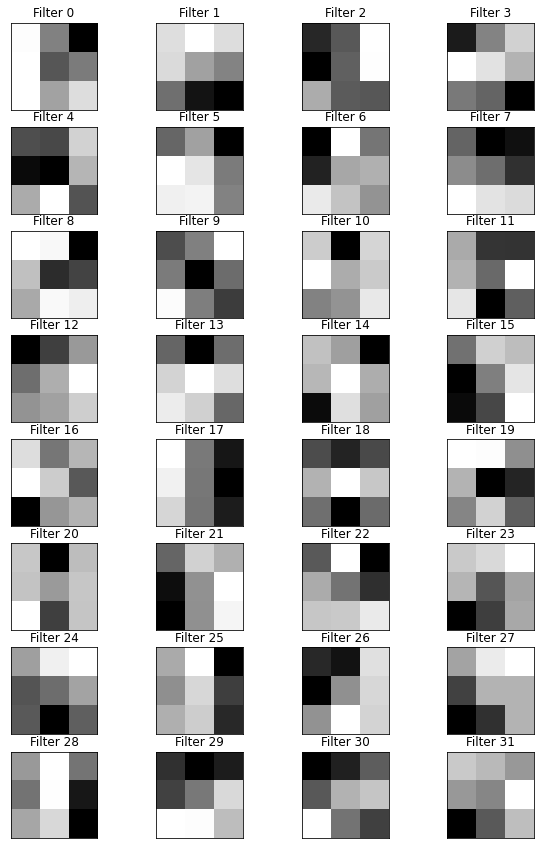

In [10]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

# retrieve weights from the first input layer
filters, biases = model.layers[0].get_weights()

fig=plt.figure()
fig = plt.gcf()
fig.set_figwidth(10)
fig.set_figheight(15)

# Visualizing filters in first layer
for i in range(0,32):
    ax=fig.add_subplot(8,4,i+1) 
    f = filters[:, :, :, i]
    ax.imshow(f[:, :, 0], cmap=plt.get_cmap('gray'))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Filter {i}')

Next, we will look at the output of applying the first convolution layer to a random input image

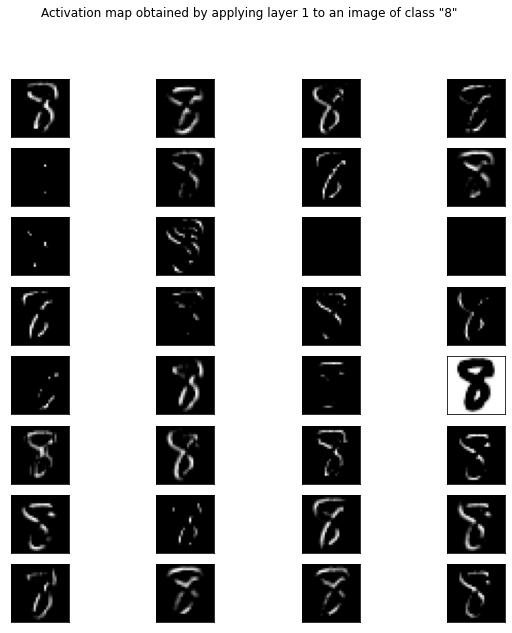

In [47]:
import random
from keras.models import Model
from numpy import expand_dims

# Feature map obtained by applying first layer to a training example 
random_cls_index = random.sample(range(0,len(train_x)), 1)
image = train_x[random_cls_index]
new_model = Model(inputs=model.inputs, outputs=model.layers[0].output)
feature_maps = new_model.predict(image)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle(f'Activation map obtained by applying layer 1 to an image of class "{chr(classmap[train_y[random_cls_index].argmax(axis=1)[0]])}"')

idx = 1
for i in range(0,32):
    ax=fig.add_subplot(8,4,i+1)       
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(feature_maps[0, :, :, i], cmap=plt.get_cmap('gray'))
    idx+=1

Let us now apply the third layer to the same input image.

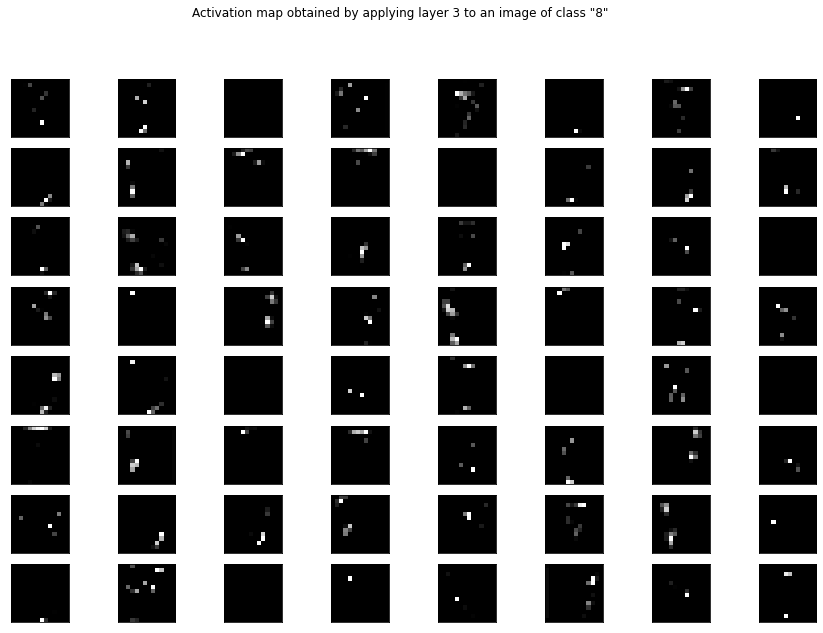

In [49]:
# Feature map obtained by applying third layer to random training image
new_model = Model(inputs=model.inputs, outputs=model.layers[2].output)
feature_maps = new_model.predict(image)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle(f'Activation map obtained by applying layer 3 to an image of class "{chr(classmap[train_y[random_cls_index].argmax(axis=1)[0]])}"')

for i in range(0,64):
    ax=fig.add_subplot(8,8,i+1)       
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(feature_maps[0, :, :, i], cmap=plt.get_cmap('gray'))

In [122]:
# Let's fit our model on the training data
# We will also use a validation set to test how well the model is generalizing
history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
2468/2468 [==============================] - 128s 51ms/step - loss: 1.1650 - accuracy: 0.6650 - val_loss: 0.4813 - val_accuracy: 0.8353
Epoch 2/10
2468/2468 [==============================] - 182s 74ms/step - loss: 0.4267 - accuracy: 0.8532 - val_loss: 0.3994 - val_accuracy: 0.8606
Epoch 3/10
2468/2468 [==============================] - 141s 57ms/step - loss: 0.3480 - accuracy: 0.8753 - val_loss: 0.3845 - val_accuracy: 0.8656
Epoch 4/10
2468/2468 [==============================] - 116s 47ms/step - loss: 0.2979 - accuracy: 0.8908 - val_loss: 0.3719 - val_accuracy: 0.8660
Epoch 5/10
2468/2468 [==============================] - 85s 34ms/step - loss: 0.2574 - accuracy: 0.9015 - val_loss: 0.3797 - val_accuracy: 0.8649
Epoch 6/10
2468/2468 [==============================] - 85s 35ms/step - loss: 0.2264 - accuracy: 0.9124 - val_loss: 0.3977 - val_accuracy: 0.8644
Epoch 7/10
2468/2468 [==============================] - 86s 35ms/step - loss: 0.2022 - accuracy: 0.9192 - val_loss: 0.41

In [123]:
# Saving model
import os
cwd = os.getcwd()
save_path = os.path.join(cwd, 'model_without_dropout_v1')
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Ref: https://keras.io/getting_started/faq/#how-can-i-install-hdf5-or-h5py-to-save-my-models
model.save(save_path, save_format='tf')

INFO:tensorflow:Assets written to: /Users/madhumitharaghu/Desktop/Miscellaneous/MachineLearningPortfolio/MachineLearningProjects/OCR/model_without_dropout_v1/assets


Let's visualize the data obtained from the output of FIT.

In [124]:
# Plotting the training and validation error and accuracy for 10 epochs
def plot_fit_data(history, comment=""):
    x_labels = range(1,11)
    y_data_1 = history.history['loss']
    y_data_2 = history.history['val_loss']
    plt.subplot(1,2,1)
    plt.plot(x_labels, y_data_1, label = "Training error")
    plt.plot(x_labels, y_data_2, label = "Validation error")
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title("Training and validation error" + comment)
    plt.legend(loc='upper left')

    plt.subplot(1,2,2)
    y_data_1 = history.history['accuracy']
    y_data_2 = history.history['val_accuracy']
    plt.plot(x_labels, y_data_1, label = "Training accuracy")
    plt.plot(x_labels, y_data_2, label = "Validation accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title("Training and validation accuracy" + comment)
    plt.legend()
    fig = plt.gcf()
    fig.set_figwidth(15)
    fig.set_figheight(5)
    plt.show()

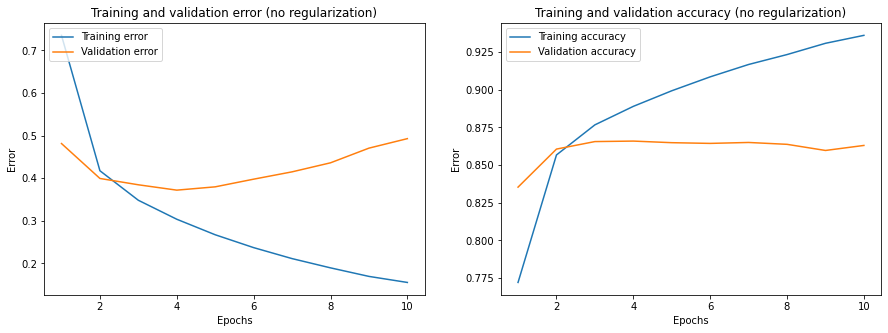

In [125]:
# Plotting accuracy and error
plot_fit_data(history, " (no regularization)")

We will evaluate the model on our test data:

In [139]:
def print_model_metrics(model, data, labels):
    loss_m, accuracy_m = model.evaluate(data, labels, verbose=0)
    print("Loss:", loss_m)
    print("Accuracy:", accuracy_m)
    print("-----------")

In [140]:
from sklearn.metrics import classification_report
def print_classification_report(model, data, data_label, all_labels):
    predLables = model.predict(data)
    pred_classes = predLables.argmax(axis=1)
    act_classes = data_label.argmax(axis=1)
    print(classification_report(act_classes, pred_classes, target_names=all_labels))

In [141]:
# Model evaluation on training data
print('Evaluating model on training data')
print_model_metrics(model, train_x, train_y)
print('Printing classification report on training data')
print_classification_report(model, train_x, train_y, labels)
print("-----------")

# Model evaluation on test data
print('Evaluating model on test data')
print_model_metrics(model, test_x, test_y)
print('Printing classification report on testing data')
print_classification_report(model, test_x, test_y, labels)
print("-----------")

Evaluating model on training data
Loss: 0.2389277219772339
Accuracy: 0.92159503698349
-----------
Printing classification report on training data
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      2400
           1       0.57      0.80      0.67      2400
           2       0.92      0.95      0.93      2400
           3       0.99      0.99      0.99      2400
           4       0.98      0.95      0.96      2400
           5       0.91      0.96      0.94      2400
           6       0.96      0.97      0.97      2400
           7       0.98      0.99      0.99      2400
           8       0.96      0.98      0.97      2400
           9       0.77      0.94      0.85      2400
           A       0.99      0.95      0.97      2400
           B       0.99      0.97      0.98      2400
           C       0.98      0.99      0.98      2400
           D       0.96      0.97      0.96      2400
           E       0.99      0.99      0.99

From the training and validation error plot, we see that validation loss reduces for an apic and then increases. This is an indication of overfitting. The model is doing really well on the training data. However, it is not able to generalize well. this is why we have a very high accuracy of 92% on the training data and lower accuracy of 86.3% on the test data. One way to address this is to include a dropout layer. Let's see how that works.

In [130]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

      
def build_model_with_dropout():
    model = Sequential()
    # Add a convolution layer with 32 filters
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))  
    model.add(MaxPooling2D(pool_size=2))
    # Add a second convolution layer
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))          
    model.add(MaxPooling2D(pool_size=2))        
    model.add(Flatten())
    # First fully connected layer with 128 units
    model.add(Dense(units=128, activation='relu'))
    # First dropout layer
    model.add(Dropout(.5))
    # Output layer with 47 units
    model.add(Dense(units=47, activation='softmax')) 
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    return model

In [131]:
model_with_dropout = build_model_with_dropout()
model_with_dropout.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [132]:
history_with_dropout = model_with_dropout.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
2468/2468 [==============================] - 123s 49ms/step - loss: 1.8387 - accuracy: 0.4795 - val_loss: 0.5170 - val_accuracy: 0.8268
Epoch 2/10
2468/2468 [==============================] - 145s 59ms/step - loss: 0.7735 - accuracy: 0.7523 - val_loss: 0.4467 - val_accuracy: 0.8453
Epoch 3/10
2468/2468 [==============================] - 140s 57ms/step - loss: 0.6483 - accuracy: 0.7847 - val_loss: 0.4188 - val_accuracy: 0.8553
Epoch 4/10
2468/2468 [==============================] - 113s 46ms/step - loss: 0.5755 - accuracy: 0.8063 - val_loss: 0.3954 - val_accuracy: 0.8558
Epoch 5/10
2468/2468 [==============================] - 103s 42ms/step - loss: 0.5395 - accuracy: 0.8159 - val_loss: 0.3815 - val_accuracy: 0.8651
Epoch 6/10
2468/2468 [==============================] - 114s 46ms/step - loss: 0.4987 - accuracy: 0.8307 - val_loss: 0.3766 - val_accuracy: 0.8655
Epoch 7/10
2468/2468 [==============================] - 132s 54ms/step - loss: 0.4796 - accuracy: 0.8357 - val_loss: 0

In [133]:
# Saving model
import os
cwd = os.getcwd()
save_path = os.path.join(cwd, 'model_with_dropout_v1')
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Ref: https://keras.io/getting_started/faq/#how-can-i-install-hdf5-or-h5py-to-save-my-models
model_with_dropout.save(save_path, save_format='tf')

INFO:tensorflow:Assets written to: /Users/madhumitharaghu/Desktop/Miscellaneous/MachineLearningPortfolio/MachineLearningProjects/OCR/model_with_dropout_v1/assets


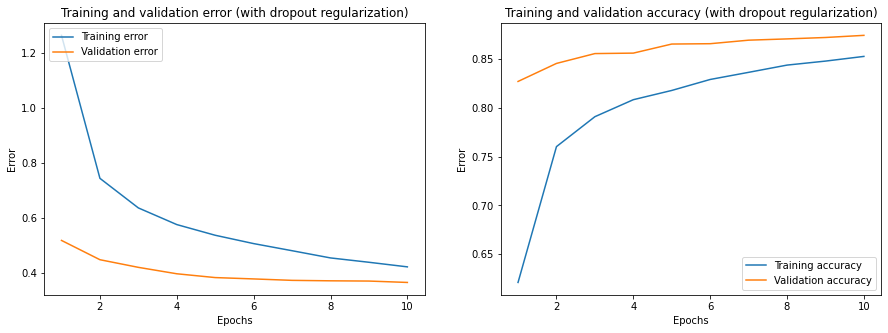

In [134]:
# Plotting accuracy and error
plot_fit_data(history_with_dropout, " (with dropout regularization)")

In [142]:
# Model evaluation on training data
print('Evaluating model on training data')
print_model_metrics(model_with_dropout, train_x, train_y)
print('Printing classification report on training data')
print_classification_report(model_with_dropout, train_x, train_y, labels)
print("-----------")
# Model evaluation on test data
print('Evaluating model on test data')
print_model_metrics(model_with_dropout, test_x, test_y)
print('Printing classification report on testing data')
print_classification_report(model_with_dropout, test_x, test_y, labels)
print("-----------")

Evaluating model on training data
Loss: 0.28266242146492004
Accuracy: 0.8972065448760986
-----------
Printing classification report on training data
              precision    recall  f1-score   support

           0       0.63      0.81      0.71      2400
           1       0.54      0.80      0.65      2400
           2       0.89      0.95      0.92      2400
           3       0.98      0.99      0.98      2400
           4       0.94      0.95      0.94      2400
           5       0.98      0.87      0.92      2400
           6       0.95      0.93      0.94      2400
           7       0.98      0.99      0.98      2400
           8       0.95      0.94      0.95      2400
           9       0.70      0.87      0.78      2400
           A       0.95      0.98      0.97      2400
           B       0.97      0.97      0.97      2400
           C       0.94      0.98      0.96      2400
           D       0.96      0.94      0.95      2400
           E       0.99      0.98      0

One thing to note is that the F1 scores for a subset of classes seem to be low - 1, F, L, O etc. These are the classes with the highest misclassification rate. We will visualize this below.

### Misclassifications per class ###

Let's visualize the miscclassifications for all the classes using a confusion matrix.

<AxesSubplot:>

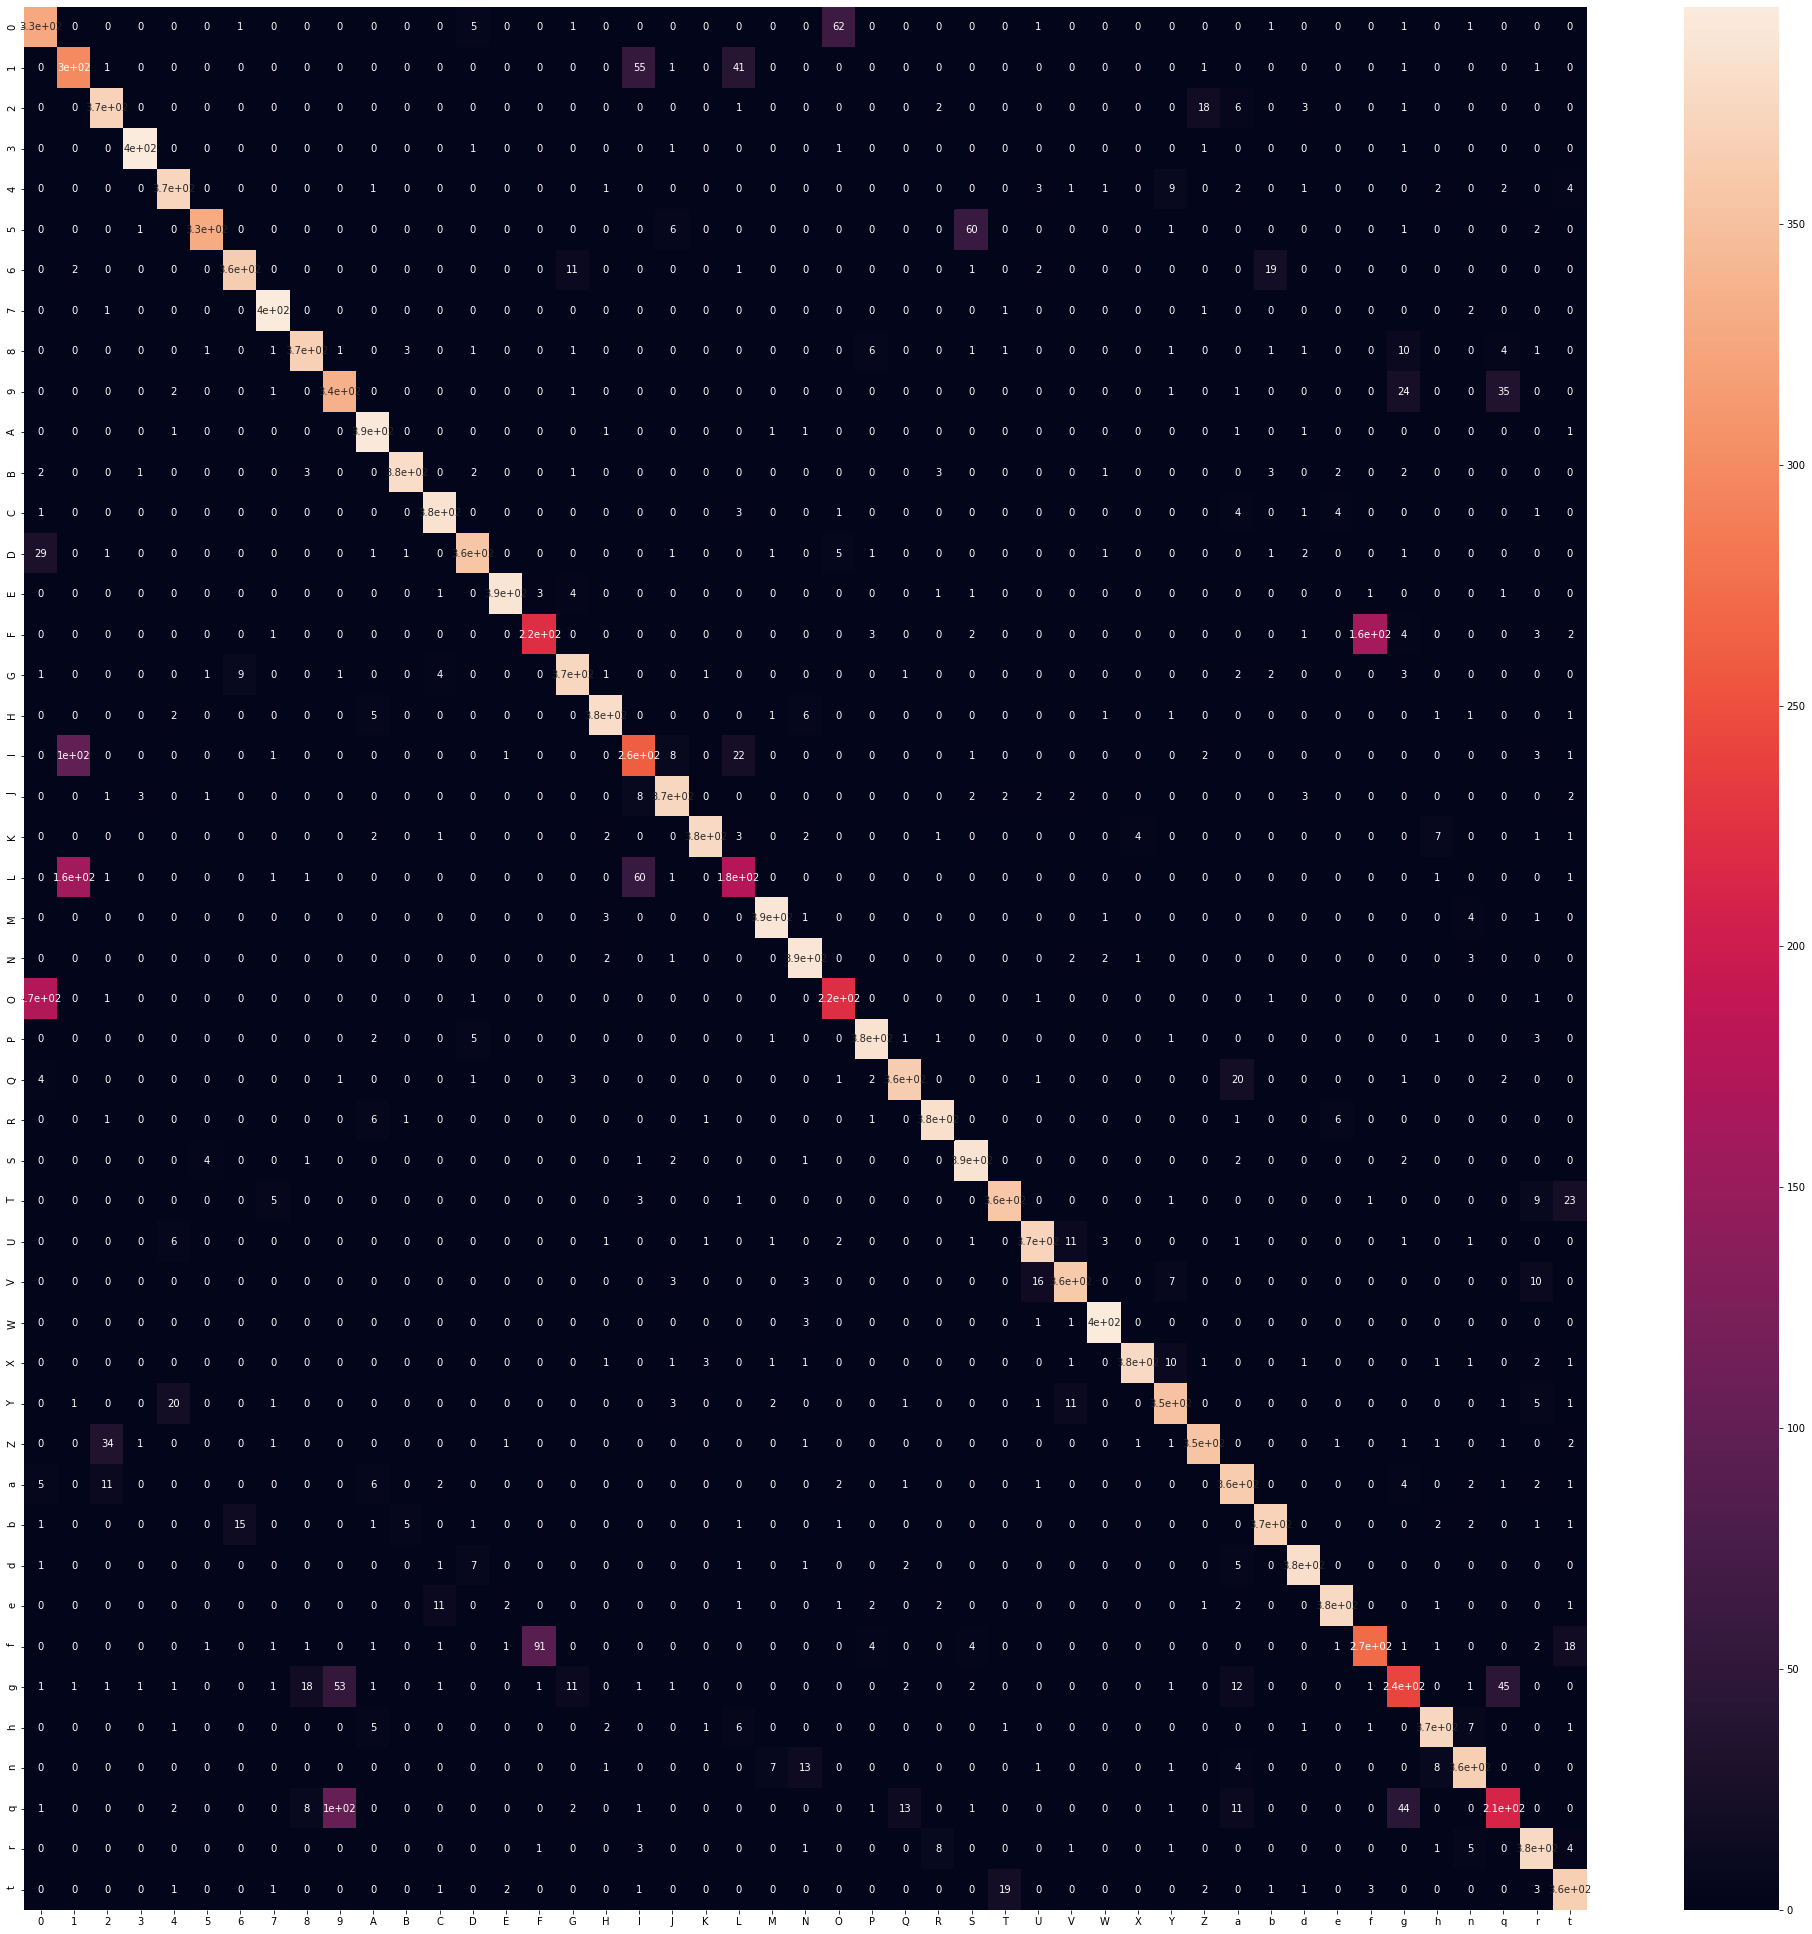

In [136]:
# Confusion matrix
# Ref: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn.metrics import confusion_matrix
import seaborn as sns
predLables = model_with_dropout.predict(test_x)
conf_matrix = confusion_matrix(test_y.argmax(axis=1), predLables.argmax(axis=1))
fig, ax = plt.subplots(figsize=(35,35))
labels = list(map(chr, list(classmap.values)))
sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels)

We can see that the diagonal entries have high values - This indicates that in most cases the labels are predicted correctly. There are certain other regions in this matrix which have slightly high values and this indicate the misclassifications.

It would also be good to find out which classes have the highest misclassification rate (number of misclassifications/total number of samples in a particular class)

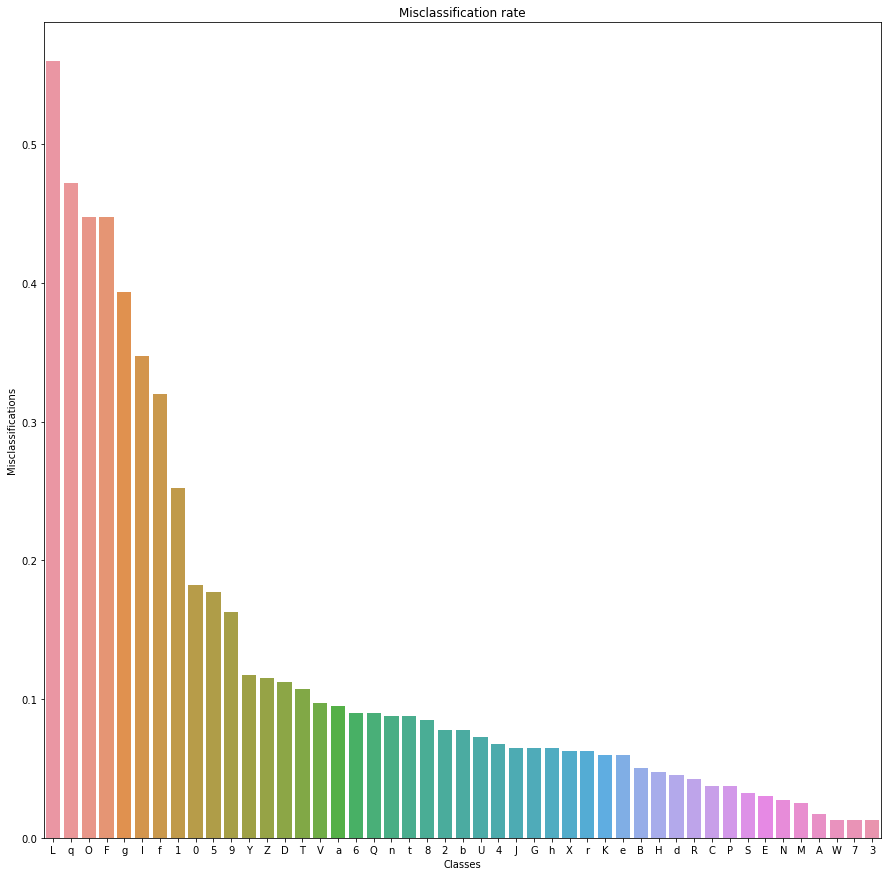

In [137]:
# Find images where data was misclassified
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

predLables = model_with_dropout.predict(test_x)
labels = list(map(chr, list(classmap.values)))
pred_classes = predLables.argmax(axis=1)
act_classes = test_y.argmax(axis=1)
difference = abs(pred_classes - act_classes)
mismatch = np.nonzero(difference)

rcParams['figure.figsize'] = 15,15

misclassification = []
for iter in range(0, 47):
    idx = np.where(act_classes == iter)
    res = pred_classes[idx[0]]
    indx = np.where(res != iter)
    mismatch = idx[0][indx[0]]
    misclassification.append(len(mismatch)/len(idx[0]))

x_labels = range(0,47)
misclass_df = pd.DataFrame(list(zip(labels,misclassification)), columns=['Classes', 'Misclassifications'])
ax = sns.barplot(x="Classes", y="Misclassifications", data=misclass_df.sort_values(by=['Misclassifications'], ascending=False)).set_title('Misclassification rate')

Classes "L", "q", "F", "I", "O", "g", "0", "f" and "1" seem to have high misclassification rates. It would be good to look at what kind of test images were given to the model with these labels.

Percentage of misclassifications for class "L" is 56.00000000000001 %
Percentage of misclassifications for class "q" is 47.25 %
Percentage of misclassifications for class "O" is 44.75 %
Percentage of misclassifications for class "F" is 44.75 %
Percentage of misclassifications for class "g" is 39.34837092731829 %


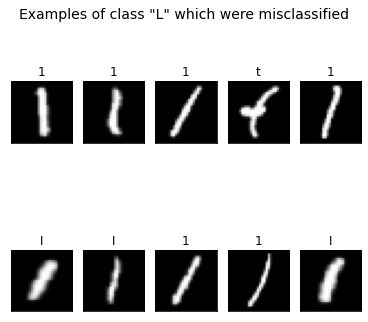

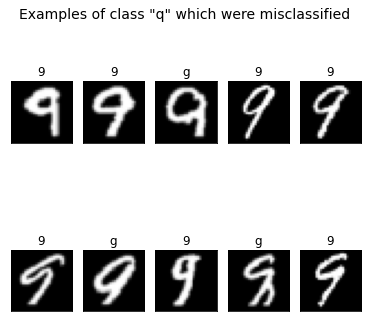

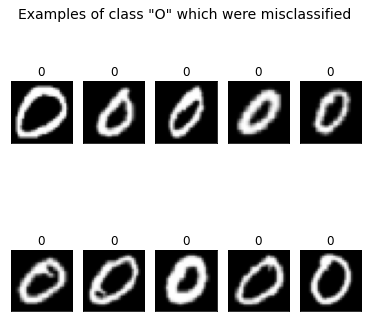

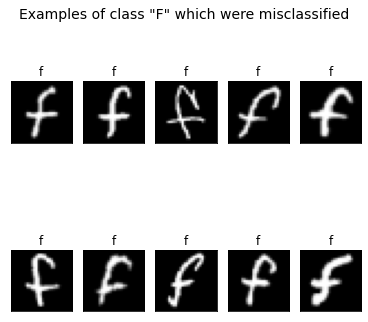

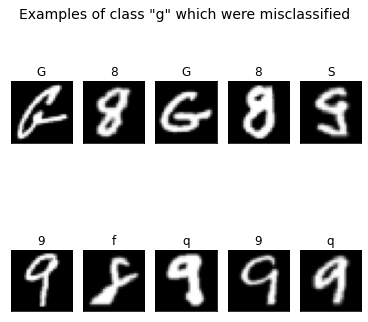

In [138]:
# Look at top 5 clases which were misclassified
import random
misclass_df = pd.DataFrame(list(zip(x_labels,misclassification)), columns=['Classes', 'Misclassifications'])
top_five = misclass_df.sort_values(by=['Misclassifications'], ascending=False)
top_five = top_five[0:5]
    
for iter in range(0,len(top_five)):
    total_test_points = len(act_classes[act_classes == top_five.iloc[iter].Classes])
    misc = top_five.iloc[iter].Misclassifications
    perc = misc*100
    print(f'Percentage of misclassifications for class "{chr(classmap[top_five.iloc[iter].Classes])}" is {perc} %')
    idx = np.where(act_classes == top_five.iloc[iter].Classes)
    res = pred_classes[idx[0]]
    indx = np.where(res != top_five.iloc[iter].Classes)
    mismatch = idx[0][indx[0]]
    random_index = random.sample(list(mismatch), 10)
    count = 0
    fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(5,5))
    for ax in axs.flat:
        image = test_x[mismatch[count]]
        image = image[:,:,0]
        ax.imshow(image, cmap=plt.get_cmap('gray'))
        ax.set_title(chr(classmap[pred_classes[mismatch[count]]]))
        ax.set_xticks([])
        ax.set_yticks([])
        count += 1
    fig = plt.gcf()
    fig.suptitle(f'Examples of class "{chr(classmap[top_five.iloc[iter].Classes])}" which were misclassified', fontsize=14)

We can see that around 60% of test images with label "L" were misclassified. From the images, it is difficult for a human to identify the label too! The same applies to the other categories also. The model seems to have predicted a label that is the closest match.

In order to improve the accuracy, we might need to have more information about the context. For e.g., if these characters are used in a sentence, then we might be able to make an accurate prediction based on how the sentence is consructed (grammatically accurate).

### Data augmentation to test model on newer inputs ###

In [218]:
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
import numpy.matlib

datagen = ImageDataGenerator(
    featurewise_center=True, # Set input mean to 0 over the dataset, feature-wise
    featurewise_std_normalization=True, # Divide inputs by std of the dataset, feature-wise.
    rotation_range=90, # Shift image by 90 degrees
    width_shift_range=0.2, # Shift pixel width by specified amount
    height_shift_range=0.3, # Shift pixel height by specified amount
    horizontal_flip=True) # Flip image

Let us pick a training example of some of the classes with a high misclassification rate, apply data augmentation to it and test our model.

"L" was predicted as: ['T', 'r', 'J', 'h', 'K', 'T', 'V', 'J', '7']


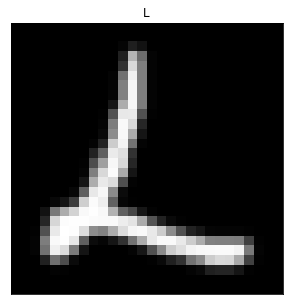

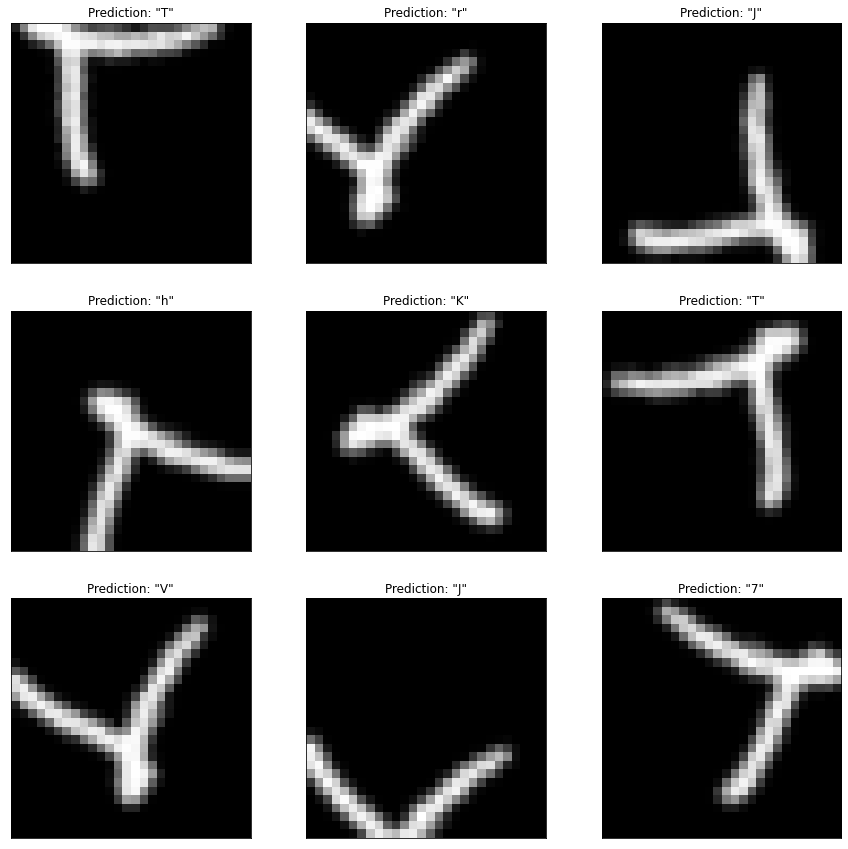

In [219]:
misclass_df = misclass_df.sort_values(by=['Misclassifications'], ascending=False)

# Pick class with first highest misclassification rate
cls_idx = misclass_df.iloc[0,:].values[0]

# Pick a training image which belongs to this class
indx = np.where(train_y.argmax(axis=1) == cls_idx)
random_index = random.sample(list(indx[0]), 1)

img = train_x[random_index,:]
plt.imshow(np.squeeze(img), cmap=plt.get_cmap('gray'))
ax = plt.gca()
fig = plt.gcf()
fig.set_figwidth(5)
fig.set_figheight(5)
ax.set_title(chr(classmap[cls_idx]))
ax.set_xticks([])
ax.set_yticks([])

# prepare iterator
plt.figure()
it = datagen.flow(img, batch_size=1)
# generate samples, plot and try to classify
predictions = []
for i in range(9):
    pyplot.subplot(3,3,i+1)
    batch = it.next()
    image = batch[0]
    ax = plt.gca()
    ax.imshow(np.squeeze(image), cmap=plt.get_cmap('gray'))
    ax.set_xticks([])
    ax.set_yticks([])
    value = model_with_dropout.predict(np.expand_dims(image, axis=0)).argmax(axis=1)[0]
    ax.set_title(f'Prediction: "{chr(classmap[value])}"')
    predictions.append(value)

print(f'"L" was predicted as: {list(map(chr, classmap[predictions]))}')

Clearly, augmenting the image impacts the prediction results for this class.